In [63]:
# Задание вытащить все вакансии СБЕРа с ХХ (у апи есть ограничение в 2000, подумайте как его обойти)
# Вытащите все полные описания этих вакансий по запросу с https://api.hh.ru/vacancies/43326020 где 43326020 id вакансии
# Создайте аналогичный vacancy DataFrame только добавьте поле skills
# Переведите даты публикаций в datetime
# Постройте график опубликованных вакансий по датам
# Переведите даты в дни недели, и определите день недели, в который больше всего публикуют вакансий
# Найдите те вакансии с использованием python, которые вам интересны
# Определите по полю skills какие навыки больше всего востребованы для этих вакансий, и
# Постройте график наиболее востребованных вакансий

In [1]:
import requests
import pandas as pd
from tqdm.auto import tqdm

In [2]:
sber = '3529'
page = 1
num_per_page = 100
moscow = 1
url = f'https://api.hh.ru/vacancies?employer_id={sber}&per_page={num_per_page}'

In [3]:
res = requests.get(url)
vacancies = res.json()
num_pages = vacancies.get('pages')
num_pages

20

In [4]:
# Задание вытащить все вакансии СБЕРа с ХХ (у апи есть ограничение в 2000, подумайте как его обойти)
vac_df = pd.DataFrame()
all_vacancy_ids= []
for i in tqdm(range(vacancies.get('pages'))):
    url = f'https://api.hh.ru/vacancies?employer_id={sber}&page={i}&per_page={num_per_page}&area={moscow}'
    res = requests.get(url)
    vacancies = res.json()
    vac_df = pd.concat([vac_df, pd.json_normalize(vacancies['items'])], axis = 0)
    print(vacancies['items'])
    vacancy_ids = [el.get('id') for el in vacancies.get('items')]
    all_vacancy_ids.extend(vacancy_ids)

  0%|          | 0/20 [00:00<?, ?it/s]

[{'id': '54852945', 'premium': False, 'name': 'Менеджер по работе с клиентами', 'department': {'id': '3529-3529-stat', 'name': 'Сбер. Начало карьеры'}, 'has_test': False, 'response_letter_required': False, 'area': {'id': '1', 'name': 'Москва', 'url': 'https://api.hh.ru/areas/1'}, 'salary': {'from': 89000, 'to': None, 'currency': 'RUR', 'gross': True}, 'type': {'id': 'open', 'name': 'Открытая'}, 'address': None, 'response_url': None, 'sort_point_distance': None, 'published_at': '2022-04-15T15:42:48+0300', 'created_at': '2022-04-15T15:42:48+0300', 'archived': False, 'apply_alternate_url': 'https://hh.ru/applicant/vacancy_response?vacancyId=54852945', 'insider_interview': None, 'url': 'https://api.hh.ru/vacancies/54852945?host=hh.ru', 'alternate_url': 'https://hh.ru/vacancy/54852945', 'relations': [], 'employer': {'id': '3529', 'name': 'Сбербанк', 'url': 'https://api.hh.ru/employers/3529', 'alternate_url': 'https://hh.ru/employer/3529', 'logo_urls': {'original': 'https://hhcdn.ru/employer

[{'id': '54704972', 'premium': False, 'name': 'Product Owner', 'department': {'id': '3529-3529-prof', 'name': 'Сбер для экспертов'}, 'has_test': False, 'response_letter_required': False, 'area': {'id': '1', 'name': 'Москва', 'url': 'https://api.hh.ru/areas/1'}, 'salary': None, 'type': {'id': 'open', 'name': 'Открытая'}, 'address': {'city': 'Москва', 'street': 'Кутузовский проспект', 'building': '32к1', 'description': None, 'lat': 55.741338, 'lng': 37.531127, 'raw': 'Москва, Кутузовский проспект, 32к1', 'metro': {'station_name': 'Кутузовская', 'line_name': 'Филевская', 'station_id': '4.73', 'line_id': '4', 'lat': 55.740544, 'lng': 37.5341}, 'metro_stations': [{'station_name': 'Кутузовская', 'line_name': 'Филевская', 'station_id': '4.73', 'line_id': '4', 'lat': 55.740544, 'lng': 37.5341}, {'station_name': 'Кутузовская', 'line_name': 'МЦК', 'station_id': '95.536', 'line_id': '95', 'lat': 55.740833, 'lng': 37.533333}], 'id': '731097'}, 'response_url': None, 'sort_point_distance': None, 'pu

[{'id': '53934486', 'premium': False, 'name': 'Data Engineer', 'department': {'id': '3529-3529-it', 'name': 'Сбер. IT'}, 'has_test': False, 'response_letter_required': False, 'area': {'id': '1', 'name': 'Москва', 'url': 'https://api.hh.ru/areas/1'}, 'salary': None, 'type': {'id': 'open', 'name': 'Открытая'}, 'address': None, 'response_url': None, 'sort_point_distance': None, 'published_at': '2022-04-11T09:12:45+0300', 'created_at': '2022-04-11T09:12:45+0300', 'archived': False, 'apply_alternate_url': 'https://hh.ru/applicant/vacancy_response?vacancyId=53934486', 'insider_interview': None, 'url': 'https://api.hh.ru/vacancies/53934486?host=hh.ru', 'alternate_url': 'https://hh.ru/vacancy/53934486', 'relations': [], 'employer': {'id': '3529', 'name': 'Сбербанк', 'url': 'https://api.hh.ru/employers/3529', 'alternate_url': 'https://hh.ru/employer/3529', 'logo_urls': {'original': 'https://hhcdn.ru/employer-logo-original/868362.JPG', '90': 'https://hhcdn.ru/employer-logo/3914323.jpeg', '240': 

[{'id': '54752531', 'premium': False, 'name': 'Java-разработчик (проект - Отчет о кредитной истории)', 'department': {'id': '3529-3529-prof', 'name': 'Сбер для экспертов'}, 'has_test': False, 'response_letter_required': False, 'area': {'id': '1', 'name': 'Москва', 'url': 'https://api.hh.ru/areas/1'}, 'salary': None, 'type': {'id': 'open', 'name': 'Открытая'}, 'address': None, 'response_url': None, 'sort_point_distance': None, 'published_at': '2022-04-12T10:47:38+0300', 'created_at': '2022-04-12T10:47:38+0300', 'archived': False, 'apply_alternate_url': 'https://hh.ru/applicant/vacancy_response?vacancyId=54752531', 'insider_interview': None, 'url': 'https://api.hh.ru/vacancies/54752531?host=hh.ru', 'alternate_url': 'https://hh.ru/vacancy/54752531', 'relations': [], 'employer': {'id': '3529', 'name': 'Сбербанк', 'url': 'https://api.hh.ru/employers/3529', 'alternate_url': 'https://hh.ru/employer/3529', 'logo_urls': {'original': 'https://hhcdn.ru/employer-logo-original/868362.JPG', '90': 'h

[{'id': '54563338', 'premium': False, 'name': 'Java Developer (Социальные и зарплатные решения)', 'department': {'id': '3529-3529-it', 'name': 'Сбер. IT'}, 'has_test': False, 'response_letter_required': False, 'area': {'id': '1', 'name': 'Москва', 'url': 'https://api.hh.ru/areas/1'}, 'salary': None, 'type': {'id': 'open', 'name': 'Открытая'}, 'address': None, 'response_url': None, 'sort_point_distance': None, 'published_at': '2022-04-04T15:27:17+0300', 'created_at': '2022-04-04T15:27:17+0300', 'archived': False, 'apply_alternate_url': 'https://hh.ru/applicant/vacancy_response?vacancyId=54563338', 'insider_interview': None, 'url': 'https://api.hh.ru/vacancies/54563338?host=hh.ru', 'alternate_url': 'https://hh.ru/vacancy/54563338', 'relations': [], 'employer': {'id': '3529', 'name': 'Сбербанк', 'url': 'https://api.hh.ru/employers/3529', 'alternate_url': 'https://hh.ru/employer/3529', 'logo_urls': {'original': 'https://hhcdn.ru/employer-logo-original/868362.JPG', '90': 'https://hhcdn.ru/e

[{'id': '54847721', 'premium': False, 'name': 'DevOps инженер', 'department': {'id': '3529-3529-it', 'name': 'Сбер. IT'}, 'has_test': False, 'response_letter_required': False, 'area': {'id': '1', 'name': 'Москва', 'url': 'https://api.hh.ru/areas/1'}, 'salary': None, 'type': {'id': 'open', 'name': 'Открытая'}, 'address': None, 'response_url': None, 'sort_point_distance': None, 'published_at': '2022-04-15T13:24:05+0300', 'created_at': '2022-04-15T13:24:05+0300', 'archived': False, 'apply_alternate_url': 'https://hh.ru/applicant/vacancy_response?vacancyId=54847721', 'insider_interview': None, 'url': 'https://api.hh.ru/vacancies/54847721?host=hh.ru', 'alternate_url': 'https://hh.ru/vacancy/54847721', 'relations': [], 'employer': {'id': '3529', 'name': 'Сбербанк', 'url': 'https://api.hh.ru/employers/3529', 'alternate_url': 'https://hh.ru/employer/3529', 'logo_urls': {'original': 'https://hhcdn.ru/employer-logo-original/868362.JPG', '90': 'https://hhcdn.ru/employer-logo/3914323.jpeg', '240':

[{'id': '52839227', 'premium': False, 'name': 'Middle ML Engineer (работа с данными) SberDevices', 'department': {'id': '3529-3529-it', 'name': 'Сбер. IT'}, 'has_test': False, 'response_letter_required': False, 'area': {'id': '1', 'name': 'Москва', 'url': 'https://api.hh.ru/areas/1'}, 'salary': None, 'type': {'id': 'open', 'name': 'Открытая'}, 'address': {'city': 'Москва', 'street': 'Кутузовский проспект', 'building': '32', 'description': None, 'lat': 55.740421, 'lng': 37.532071, 'raw': 'Москва, Кутузовский проспект, 32', 'metro': {'station_name': 'Кутузовская', 'line_name': 'МЦК', 'station_id': '95.536', 'line_id': '95', 'lat': 55.740833, 'lng': 37.533333}, 'metro_stations': [{'station_name': 'Кутузовская', 'line_name': 'МЦК', 'station_id': '95.536', 'line_id': '95', 'lat': 55.740833, 'lng': 37.533333}], 'id': '823806'}, 'response_url': None, 'sort_point_distance': None, 'published_at': '2022-04-22T10:37:53+0300', 'created_at': '2022-04-22T10:37:53+0300', 'archived': False, 'apply_alt

[{'id': '54922559', 'premium': True, 'name': 'Менеджер по работе с ключевыми клиентами малого бизнеса', 'department': {'id': '3529-3529-prof', 'name': 'Сбер для экспертов'}, 'has_test': False, 'response_letter_required': False, 'area': {'id': '1', 'name': 'Москва', 'url': 'https://api.hh.ru/areas/1'}, 'salary': {'from': 110000, 'to': None, 'currency': 'RUR', 'gross': True}, 'type': {'id': 'direct', 'name': 'Рекламная'}, 'address': None, 'response_url': 'https://hh.ru/vacancy/45790891', 'sort_point_distance': None, 'published_at': '2022-04-25T09:03:40+0300', 'created_at': '2022-04-25T09:03:40+0300', 'archived': False, 'apply_alternate_url': 'https://hh.ru/applicant/vacancy_response?vacancyId=54922559', 'immediate_redirect_url': 'https://hh.ru/vacancy/45790891', 'insider_interview': None, 'url': 'https://api.hh.ru/vacancies/54922559?host=hh.ru', 'alternate_url': 'https://hh.ru/vacancy/54922559', 'relations': [], 'employer': {'id': '3529', 'name': 'Сбербанк', 'url': 'https://api.hh.ru/emp

[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]


In [52]:
# Вытащите все полные описания этих вакансий по запросу с https://api.hh.ru/vacancies/43326020 где 43326020 id вакансии
vac_description = pd.DataFrame()
new_v_list = []
for vac_id in tqdm(all_vacancy_ids):
    url = f'https://api.hh.ru/vacancies/{vac_id}'
    res = requests.get(url)
    v1 = res.json()
    new_v_list.append(v1)
vac_description = pd.json_normalize(new_v_list)

  0%|          | 0/709 [00:00<?, ?it/s]

In [58]:
# Создайте аналогичный vacancy DataFrame только добавьте поле skills
v_skills = vac_description[['id', 'key_skills']].copy()
v_skills.head(5)

,id,key_skills
0,54852945,[]
1,54852814,[]
2,53867545,"[{'name': 'Анализ ФХД'}, {'name': 'Финансовый ..."
3,53361761,"[{'name': 'Активные продажи'}, {'name': 'Прове..."
4,54889942,"[{'name': 'Atlassian Jira'}, {'name': 'Регресc..."


In [146]:
vac_df_skills = pd.merge(vac_df,v_skills,on=['id'], how='left').copy()
vac_df_skills.head(5)

,id,premium,name,has_test,response_letter_required,address,response_url,sort_point_distance,published_at,created_at,...,address.metro.line_name,address.metro.station_id,address.metro.line_id,address.metro.lat,address.metro.lng,address.metro_stations,address.id,address.metro,immediate_redirect_url,key_skills
0,54852945,False,Менеджер по работе с клиентами,False,False,NaN,None,None,2022-04-15T15:42:48+0300,2022-04-15T15:42:48+0300,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[]
1,54852814,False,Клиентский менеджер прямых продаж,False,False,NaN,None,None,2022-04-15T15:39:37+0300,2022-04-15T15:39:37+0300,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[]
2,53867545,False,Старший кредитный аналитик (малый бизнес),False,False,NaN,None,None,2022-04-11T17:49:36+0300,2022-04-11T17:49:36+0300,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[{'name': 'Анализ ФХД'}, {'name': 'Финансовый ..."
3,53361761,False,Клиентский менеджер малого и микробизнеса,False,False,NaN,None,None,2022-04-03T10:44:38+0300,2022-04-03T10:44:38+0300,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[{'name': 'Активные продажи'}, {'name': 'Прове..."
4,54889942,False,Junior QA (СберМобайл),False,False,NaN,None,None,2022-04-18T13:52:00+0300,2022-04-18T13:52:00+0300,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[{'name': 'Atlassian Jira'}, {'name': 'Регресc..."


In [147]:
# Переведите даты публикаций в datetime
from datetime import datetime
vac_df_skills['published_at'] = pd.to_datetime(vac_df_skills['published_at'])
vac_df_skills.head(3)

,id,premium,name,has_test,response_letter_required,address,response_url,sort_point_distance,published_at,created_at,...,address.metro.line_name,address.metro.station_id,address.metro.line_id,address.metro.lat,address.metro.lng,address.metro_stations,address.id,address.metro,immediate_redirect_url,key_skills
0,54852945,False,Менеджер по работе с клиентами,False,False,NaN,None,None,2022-04-15 15:42:48+03:00,2022-04-15T15:42:48+0300,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[]
1,54852814,False,Клиентский менеджер прямых продаж,False,False,NaN,None,None,2022-04-15 15:39:37+03:00,2022-04-15T15:39:37+0300,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[]
2,53867545,False,Старший кредитный аналитик (малый бизнес),False,False,NaN,None,None,2022-04-11 17:49:36+03:00,2022-04-11T17:49:36+0300,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[{'name': 'Анализ ФХД'}, {'name': 'Финансовый ..."


In [175]:
vac_df_skills['published_at_date'] = pd.to_datetime(vac_df_skills['published_at']).dt.date

In [176]:
# Постройте график опубликованных вакансий по датам
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [177]:
totals = vac_df_skills.groupby("published_at_date")["id"].count()

In [178]:
totals

published_at_date
2022-03-27     1
2022-03-28    22
2022-03-29    12
2022-03-30    13
2022-03-31    21
2022-04-01    28
2022-04-03     1
2022-04-04    35
2022-04-05    49
2022-04-06    29
2022-04-07    20
2022-04-08    35
2022-04-10     2
2022-04-11    80
2022-04-12    40
2022-04-13    33
2022-04-14    31
2022-04-15    42
2022-04-16     2
2022-04-17     9
2022-04-18    69
2022-04-19    35
2022-04-20    22
2022-04-21    21
2022-04-22    33
2022-04-23     3
2022-04-25    21
Name: id, dtype: int64

<AxesSubplot:xlabel='published_at_date'>

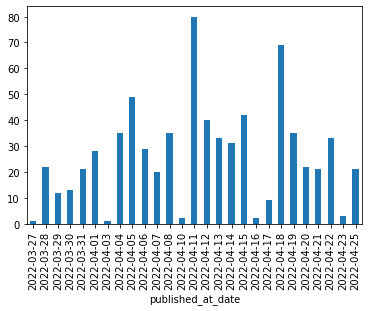

In [179]:
totals.plot(kind="bar", fontsize=10)

In [153]:
# Переведите даты в дни недели, и определите день недели, в который больше всего публикуют вакансий
vac_df_skills['weekday'] = vac_df_skills['published_at'].dt.day_name()
vac_df_skills

,id,premium,name,has_test,response_letter_required,address,response_url,sort_point_distance,published_at,created_at,...,address.metro.line_id,address.metro.lat,address.metro.lng,address.metro_stations,address.id,address.metro,immediate_redirect_url,key_skills,weekday,published_at_date
0,54852945,False,Менеджер по работе с клиентами,False,False,NaN,NaN,NaN,2022-04-15 15:42:48+03:00,2022-04-15T15:42:48+0300,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[],Friday,2022-04-15
1,54852814,False,Клиентский менеджер прямых продаж,False,False,NaN,NaN,NaN,2022-04-15 15:39:37+03:00,2022-04-15T15:39:37+0300,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[],Friday,2022-04-15
2,53867545,False,Старший кредитный аналитик (малый бизнес),False,False,NaN,NaN,NaN,2022-04-11 17:49:36+03:00,2022-04-11T17:49:36+0300,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[{'name': 'Анализ ФХД'}, {'name': 'Финансовый ...",Monday,2022-04-11
3,53361761,False,Клиентский менеджер малого и микробизнеса,False,False,NaN,NaN,NaN,2022-04-03 10:44:38+03:00,2022-04-03T10:44:38+0300,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[{'name': 'Активные продажи'}, {'name': 'Прове...",Sunday,2022-04-03
4,54889942,False,Junior QA (СберМобайл),False,False,NaN,NaN,NaN,2022-04-18 13:52:00+03:00,2022-04-18T13:52:00+0300,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[{'name': 'Atlassian Jira'}, {'name': 'Регресc...",Monday,2022-04-18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
704,54922557,True,Клиентский менеджер малого и микробизнеса,False,False,NaN,https://hh.ru/vacancy/53361761,None,2022-04-25 09:03:39+03:00,2022-04-25T09:03:39+0300,...,NaN,NaN,NaN,NaN,NaN,NaN,https://hh.ru/vacancy/53361761,"[{'name': 'Активные продажи'}, {'name': 'Прове...",Monday,2022-04-25
705,54497432,False,Infrastructure Engineer,False,False,NaN,None,None,2022-03-31 17:18:38+03:00,2022-03-31T17:18:38+0300,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[{'name': 'Linux'}, {'name': 'Bash'}, {'name':...",Thursday,2022-03-31
706,52527457,False,Инженер сопровождения инфраструктуры,False,False,NaN,None,None,2022-04-11 19:03:02+03:00,2022-04-11T19:03:02+0300,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[],Monday,2022-04-11
707,53869159,False,Cloud architect/lead developer,False,False,NaN,None,None,2022-04-11 19:03:16+03:00,2022-04-11T19:03:16+0300,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[],Monday,2022-04-11


In [154]:
totals_weekday = vac_df_skills.groupby("weekday")["id"].count().sort_values()

<AxesSubplot:xlabel='weekday'>

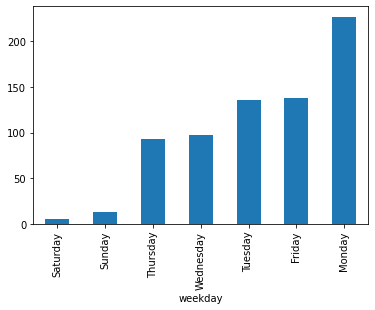

In [156]:
totals_weekday.plot(kind="bar", fontsize=10) 

In [267]:
# Найдите те вакансии с использованием python, которые вам интересны
key_words = ['Data', 'Analyst', 'Аналитик данных']

In [273]:
search_df = vac_df_skills[vac_df_skills['name'].str.contains(pat='|'.join(key_words), na=False, regex=True)]
search_df.tail()

,id,premium,name,has_test,response_letter_required,address,response_url,sort_point_distance,published_at,created_at,...,address.metro.line_id,address.metro.lat,address.metro.lng,address.metro_stations,address.id,address.metro,immediate_redirect_url,key_skills,weekday,published_at_date
680,53269426,False,Senior Data Scientist/ML Engineer SberDevices,False,False,NaN,None,None,2022-04-22 10:37:45+03:00,2022-04-22T10:37:45+0300,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[{'name': 'Python'}, {'name': 'NLP'}, {'name':...",Friday,2022-04-22
691,51411620,False,"Главный инженер по сопровождению (SberData, пр...",False,False,NaN,None,None,2022-04-18 14:02:11+03:00,2022-04-18T14:02:11+0300,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[{'name': 'ITSM'}, {'name': 'ITIL'}, {'name': ...",Monday,2022-04-18
699,54238546,False,Главный инженер сопровождения технологических ...,False,False,NaN,None,None,2022-04-22 10:46:45+03:00,2022-04-22T10:46:45+0300,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[{'name': 'Jenkins'}, {'name': 'Ansible'}, {'n...",Friday,2022-04-22
701,54238661,False,Эксперт сопровождения Hadoop (SberData),False,False,NaN,None,None,2022-04-22 10:46:55+03:00,2022-04-22T10:46:55+0300,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[{'name': 'Linux'}, {'name': 'Bash'}, {'name':...",Friday,2022-04-22
702,54916371,False,Devops (SberData),False,False,NaN,None,None,2022-04-19 11:43:01+03:00,2022-04-19T11:43:01+0300,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[{'name': 'Git'}, {'name': 'Linux'}, {'name': ...",Tuesday,2022-04-19


In [ ]:
# Определите по полю skills какие навыки больше всего востребованы для этих вакансий.

In [274]:
skills_data = search_df['key_skills'].tolist()
skill_list = []
for x in range(len(skills_data)):
    for k in range(len(skills_data[x])):
        skill_list.append(skills_data[x][k]['name'])

In [275]:
demanded_skill = pd.Series(skill_list).value_counts()
demanded_skill.head(10)

SQL                23
Python             19
Spark              14
Linux              11
Big Data           10
Java                9
Hadoop              9
Git                 7
Английский язык     7
PostgreSQL          7
dtype: int64

In [342]:
# Постройте график наиболее востребованных вакансий
demanded_search = search_df.groupby("name")["id"].count().sort_values(ascending = False)
demanded_search

name
Data Engineer                                                                  5
Аналитик данных                                                                4
Data Scientist                                                                 3
Эксперт сопровождения Hadoop (SberData)                                        2
Data Архитектор (SberData)                                                     2
Главный инженер по сопровождению (SberData, проект "Лаборатория Данных")       2
Data engineer                                                                  2
Системный аналитик (Команда архитектуры Хранилища данных, SberData)            2
Senior Quantitative Analyst                                                    1
Senior Java разработчик (SberData)                                             1
Senior Data Scientist/ML Engineer SberDevices                                  1
Solution архитектор (SberData)                                                 1
Spark разработчик (Sber

<AxesSubplot:ylabel='name'>

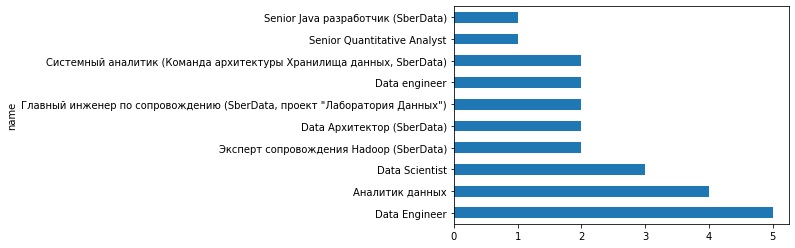

In [343]:
demanded_search.head(10).plot(ylabel='Количество', kind="barh", fontsize=10) 